In [1]:
#some import important Library
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import msgpack

In [2]:
#Load the Data set
train_info = pd.read_csv("/content/drive/My Drive/train_info.csv")

#Exploratory Data Analysis (EDA)

In [3]:
train_info.head()

,id,injection
0,14577,False
1,60186,True
2,58459,True
3,87091,True
4,44461,False


In [4]:
train_info.shape

(65854, 2)

In [5]:
train_info.columns

Index(['id', 'injection'], dtype='object')

In [6]:
train_info.dtypes

id           int64
injection     bool
dtype: object

In [7]:
train_info['injection'].unique()

array([False,  True])

In [8]:
train_info['injection'].value_counts()

False    33499
True     32355
Name: injection, dtype: int64

In [9]:
#how to check Null Values in pandas data frame
train_info.isnull().sum()

id           0
injection    0
dtype: int64

Text(0.5, 1.0, 'Count Plot for Categorical Injection Column')

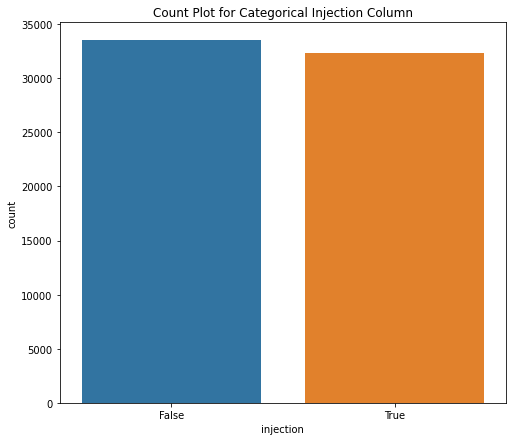

In [10]:
#Visulization the Count plot
plt.figure(figsize=(8,7))
sns.countplot(x='injection',data=train_info)
plt.title("Count Plot for Categorical Injection Column")

#Train msgpack file data as similar to a Json file

In [11]:
with open("/content/drive/My Drive/train.msgpack",'rb') as df1:
  train = msgpack.unpack(df1)

#Exploratery data Analysis (EDA)

In [12]:
train = pd.DataFrame(train)

In [13]:
train.head()

,0,1
0,59290,' and/**/38>( select\t(622)/**/from/*362 emhgp...
1,54992,"shqpkt"" union /*!426 all\t*/(select kwicwt(\t(..."
2,64287,"nhnqag"" uniondistinct--154 298 plhlre exaloq u..."
3,28821,D8j+oNbylTIGw=
4,27825,"ened \"">\n <head>\n <script data-react-hel..."


In [14]:
train.shape

(65854, 2)

In [15]:
train.columns = ['id','text']

In [16]:
train.head(5)

,id,text
0,59290,' and/**/38>( select\t(622)/**/from/*362 emhgp...
1,54992,"shqpkt"" union /*!426 all\t*/(select kwicwt(\t(..."
2,64287,"nhnqag"" uniondistinct--154 298 plhlre exaloq u..."
3,28821,D8j+oNbylTIGw=
4,27825,"ened \"">\n <head>\n <script data-react-hel..."


In [17]:
train.shape

(65854, 2)

In [18]:
train = pd.DataFrame(train)

In [19]:
#Merge two file
df = pd.merge(train, train_info, on='id')

In [20]:
df.head()

,id,text,injection
0,59290,' and/**/38>( select\t(622)/**/from/*362 emhgp...,True
1,54992,"shqpkt"" union /*!426 all\t*/(select kwicwt(\t(...",True
2,64287,"nhnqag"" uniondistinct--154 298 plhlre exaloq u...",True
3,28821,D8j+oNbylTIGw=,False
4,27825,"ened \"">\n <head>\n <script data-react-hel...",False


In [21]:
df.isnull().sum()

id           0
text         0
injection    0
dtype: int64

In [22]:
df.columns

Index(['id', 'text', 'injection'], dtype='object')

In [23]:
df['injection'].value_counts()

False    33499
True     32355
Name: injection, dtype: int64

In [24]:
df.shape

(65854, 3)

In [25]:
#Remove 'id' column
df.drop(['id'],axis=1,inplace=True)

In [26]:
df.head()

,text,injection
0,' and/**/38>( select\t(622)/**/from/*362 emhgp...,True
1,"shqpkt"" union /*!426 all\t*/(select kwicwt(\t(...",True
2,"nhnqag"" uniondistinct--154 298 plhlre exaloq u...",True
3,D8j+oNbylTIGw=,False
4,"ened \"">\n <head>\n <script data-react-hel...",False


In [27]:
df['injection'].unique()

array([ True, False])

#Cleaning and Preprocessing the Data set

In [28]:
#Importing some essential library
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
#Cleaning the text column
corpus = []
ps = PorterStemmer()
for i in range(0,train.shape[0]):
  text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=train.text[i])
  text = text.lower()
  words = text.split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  text = ' '.join(words)
  corpus.append(text)

In [30]:
corpus[0:10]

['select emhgpv gpnqdn odpxkn qgnoyb htipaw',
 'shqpkt union select kwicwt yaaoda konjlq nykna byamlo xfsesf dqoyrp sbecbl lhnjpg kkicjp udkygv hoewxv',
 'nhnqag uniondistinct plhlre exaloq unyot select rpfeir rttlat gsjxjq kuoopt vxhuha kfbvww mkhkjq omqjmj gvdira mcrgew oqrhwp jhseux xpayss fctnj vdqoyq apxkvx mhjblm yxnynl lllpue exampl exampl',
 'j onbyltigw',
 'ene n head n script data react helmet true type text javascript function w byte gettim event exampl exampl var f getelementsbytag byte j f n window document script datalay gtm byte ype text javascript src exampl exampl co byte async script n meta charset utf byte g n link rel stylesheet href static css main byte exampl exampl n titl data react helmet true byte script type text javascript n byte z locat hash byte span div class drop data reactid byte center titl green style data reactid byte data reactid react empti',
 'union',
 'union yguxsk select exlgjh cirwsi qbtidf xhqujm xwfefv jvxefn rfkgml rpkpyn eacbcl xfofsu ciadln

In [31]:
# Creating Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

In [32]:
X = pd.DataFrame(vectors, columns=feature_names)

In [33]:
X.shape

(65854, 5000)

In [34]:
#Converting bool 'injection' column into numeric form
y = np.array([1 if i == True else 0 for i in df.injection.values])

In [35]:
y

array([1, 1, 1, ..., 1, 0, 0])

#Split the Data set

In [36]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X, y,test_size=0.2,random_state=42)

#Model Building corresponding to training data set

In [37]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(training_x,training_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = lr.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(test_y,y_pred)

0.934780958165667

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
lr_cm = confusion_matrix(test_y,y_pred)
lr_cm

array([[6652,   95],
       [ 764, 5660]])

In [43]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6747
           1       0.98      0.88      0.93      6424

    accuracy                           0.93     13171
   macro avg       0.94      0.93      0.93     13171
weighted avg       0.94      0.93      0.93     13171



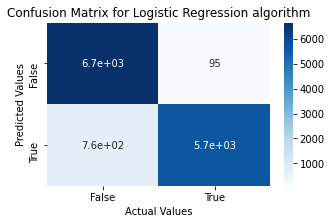

In [44]:
plt.figure(figsize=(5,3))
sns.heatmap(data=lr_cm, annot=True, cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False ','True'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Logistic Regression algorithm")
plt.show()

In [45]:
#Multinomial Naive_Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
y_pred = mnb.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(test_y,y_pred)

0.9255181838888467

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
mnb_cm = confusion_matrix(test_y,y_pred)
mnb_cm

array([[6584,  163],
       [ 818, 5606]])

In [51]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6747
           1       0.97      0.87      0.92      6424

    accuracy                           0.93     13171
   macro avg       0.93      0.92      0.93     13171
weighted avg       0.93      0.93      0.93     13171



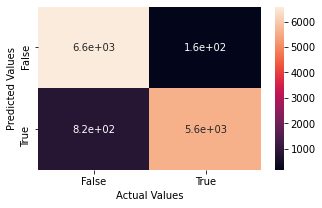

In [52]:
plt.figure(figsize=(5,3))
sns.heatmap(data=mnb_cm, annot=True, xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [53]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
#Predicting the results
y_pred = mnb.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y,y_pred)
print("-------Score---------")
print("Accuracy Score is: {}".format(round(score*100,2)))

-------Score---------
Accuracy Score is: 92.55


In [56]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)

In [57]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_mnb = MultinomialNB(alpha=i)
  temp_mnb.fit(training_x, training_y)
  temp_y_pred = temp_mnb.predict(test_x)
  score = accuracy_score(test_y, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 92.65%
Accuracy score for alpha=0.2 is: 92.65%
Accuracy score for alpha=0.3 is: 92.64%
Accuracy score for alpha=0.4 is: 92.64%
Accuracy score for alpha=0.5 is: 92.64%
Accuracy score for alpha=0.6 is: 92.63%
Accuracy score for alpha=0.7 is: 92.61%
Accuracy score for alpha=0.8 is: 92.57%
Accuracy score for alpha=0.9 is: 92.57%
Accuracy score for alpha=1.0 is: 92.55%
--------------------------------------------
The best accuracy is 92.65% with alpha value as 0.1


In [58]:
#GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(training_x,training_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_pred = gnb.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(test_y,y_pred)

0.8850504897122466

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [63]:
gnb_cm = confusion_matrix(test_y,y_pred)
gnb_cm

array([[5301, 1446],
       [  68, 6356]])

In [64]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      6747
           1       0.81      0.99      0.89      6424

    accuracy                           0.89     13171
   macro avg       0.90      0.89      0.88     13171
weighted avg       0.90      0.89      0.88     13171



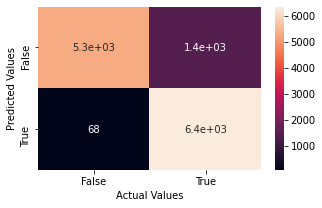

In [65]:
plt.figure(figsize=(5,3))
sns.heatmap(data=gnb_cm, annot=True, xticklabels=['False','True'],yticklabels=['False','True'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [66]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(training_x,training_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [67]:
y_pred = adb.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(test_y,y_pred)

0.9148128464049806

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [71]:
adb_cm = confusion_matrix(test_y,y_pred)
adb_cm

array([[6636,  111],
       [1011, 5413]])

In [72]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6747
           1       0.98      0.84      0.91      6424

    accuracy                           0.91     13171
   macro avg       0.92      0.91      0.91     13171
weighted avg       0.92      0.91      0.91     13171



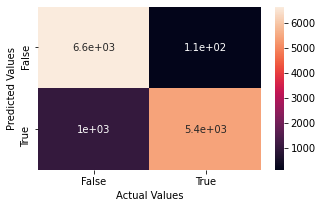

In [73]:
plt.figure(figsize=(5,3))
sns.heatmap(data=adb_cm,annot=True, xticklabels=['False','True'], yticklabels=['False','True'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [74]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(training_x,training_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_pred = rfc.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(test_y,y_pred)

0.9422974717181687

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [79]:
rfc_cm = confusion_matrix(test_y,y_pred)
rfc_cm

array([[6702,   45],
       [ 715, 5709]])

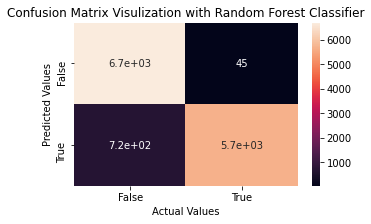

In [80]:
plt.figure(figsize=(5,3))
sns.heatmap(data=rfc_cm, annot=True, xticklabels=['False','True'],yticklabels=['False','True'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix Visulization with Random Forest Classifier")
plt.show()

#Test Data set

In [82]:
with open("/content/drive/My Drive/test.msgpack",'rb') as df2:
  test = msgpack.unpack(df2)

#Exploratery Data Analysis (EDA)

In [83]:
test = pd.DataFrame(test)

In [84]:
test.head()

,0,1
0,43427,/handler_sync_example.example?i=17S8Hq17qCMJVR...
1,86082,/web/registration?username=&_csrf=24283cb2-566...
2,19102,"<div class=""nutrifox-label"" data-recipe-id=""93..."
3,103200,%23%4E%5Clink%57rel=prefetch%52href=22628%5E
4,95244,%47%4E%5Clink%37rel=prefetch%37href=64417%8E


In [85]:
test.shape

(40000, 2)

In [86]:
test.columns = ['id','text']

In [87]:
test.head()

,id,text
0,43427,/handler_sync_example.example?i=17S8Hq17qCMJVR...
1,86082,/web/registration?username=&_csrf=24283cb2-566...
2,19102,"<div class=""nutrifox-label"" data-recipe-id=""93..."
3,103200,%23%4E%5Clink%57rel=prefetch%52href=22628%5E
4,95244,%47%4E%5Clink%37rel=prefetch%37href=64417%8E


In [88]:
#Drop the Id Column
test.drop(['id'],axis=1,inplace=True)

In [89]:
test.head()

,text
0,/handler_sync_example.example?i=17S8Hq17qCMJVR...
1,/web/registration?username=&_csrf=24283cb2-566...
2,"<div class=""nutrifox-label"" data-recipe-id=""93..."
3,%23%4E%5Clink%57rel=prefetch%52href=22628%5E
4,%47%4E%5Clink%37rel=prefetch%37href=64417%8E


#Cleaning and Preprocessing the Data set

In [90]:
#Import Some Important library for NLP
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
#Cleaning the text column
corpus = []
ps = PorterStemmer()
for i in range(0,test.shape[0]):
  text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=test.text[i])
  text = text.lower()
  words = text.split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  text = ' '.join(words)
  corpus.append(text)

In [92]:
corpus[0:10]

['handler sync exampl exampl hq qcmjvrmjtekpb vixexnr jwevc zx onpdhpefkttjmklwoa',
 'web registr usernam csrf cb b ae e fb offeraccept offeraccept e cimg src onerror javascript alert e password passwordconfirm',
 'div class nutrifox label data recip id div script async src http exampl exampl exampl exampl charset utf script',
 'e clink rel prefetch href e',
 'e clink rel prefetch href e',
 'categori exampl exampl sid c f ec c bde bbd bcc f ee psid bb dd f b fce fd da sessiontyp auditattack crawltyp none attacktyp urlparammanipul originatingengineid e e b b c attacksequ attackparamdesc attackparamindex attackparamsubindex checkid engin lfi agent smartmod nonserverspecificonli attackstr file fc fwindow exampl exampl attackstringprop attack threadid threadtyp auditorstaterequestor',
 'f f b',
 'taskid useruid dxfoi gyxb u descript span style opac span class tasklist done nbsp span span br br timestamp liveeditordescriptionrevisionid liveeditordescriptionwhoupd dxfoi gyxb u changeway',
 '

#Prediction

In [93]:
def request_api(sample_api):
  sample_api = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_api)
  sample_api = sample_api.lower()
  sample_api_words = sample_api.split()
  sample_api_words = [word for word in sample_api_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_api = [ps.stem(word) for word in sample_api_words]
  final_api = ' '.join(final_api)

  temp = tfidf.transform([final_api]).toarray()
  return rfc.predict(temp)

In [94]:
test.columns

Index(['text'], dtype='object')

In [95]:
script_api = test['text']

In [96]:
#shape of the data set
script_api.shape

(40000,)

In [97]:
#for generating random Integer Number
from random import randint

In [98]:
#Predicting values
row = randint(0,script_api.shape[0]-1)
sample_api = script_api[row]

print('API Request: {}'.format(sample_api))
if request_api(sample_api):
  print('Prediction: This is False api request Means Not Attack Api Request!')
else:
  print('Prediction: This is True api request Means Attack Api Request.')

select danlux/**/()
Prediction: This is False api request Means Not Attack Api Request!


In [99]:
#Predicting values
row = randint(0,script_api.shape[0]-1)
sample_api = script_api[row]

print('API Request: {}'.format(sample_api))
if request_api(sample_api):
  print('Prediction: This is False api request Means Not Attack Api Request!')
else:
  print('Prediction: This is True api request Means Attack Api Request.')

API Request: /handler_sync_example.example?i=pRAiL2fYiTsi3MyqfBTuuiuhXW3+W3yD5O+ONVYHXCdjFzbw6wdtkiFvyf5=
Prediction: This is True api request Means Attack Api Request.
